In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Carregar os dados do CSV
file_path = 'dados.csv'
df = pd.read_csv(file_path, sep=';', parse_dates=['Data'], dayfirst=True, index_col='Data', encoding='ISO-8859-1')

In [ ]:
# Separe as variáveis independentes
X = df.loc[:,['Receitas_Correntes_PMF','Preço_Médio_Venda_Imóvel_Residencial_FIPEZAP','ICV_UDESC',
              'Massa_Salarial_SC_IBGE_6474','Rendimento_Nominal_IBGE_6472','População_Fpolis_IBGE_5917',
              'Consumo_MWh_Celesc','Exportações_MDIC','Importações_MDIC'
                   ]]

In [ ]:
# Normalizar os dados de X e criar Dataframe
X_normalizado = scaler.fit_transform(X)
X_normalizado = pd.DataFrame(X_normalizado, columns=X.columns, index=X.index)

In [ ]:
# Separe variável dependente (PIB)
y = df.loc[:,['PIB_Fpolis_IBGE_5938']]

In [ ]:
# Normalizar os dados de y e criar Dataframe
scaler = StandardScaler()
y_normalizado = scaler.fit_transform(y)
y_normalizado = pd.DataFrame(y_normalizado, columns=y.columns, index=y.index)

In [ ]:
# Separar em treino e predição
X_normalizado_treino = X_normalizado.loc['2012-03-01':'2021-12-01']
X_normalizado_predicao = X_normalizado.loc['2022-03-01':]

y_normalizado_treino = y_normalizado.loc['2012-03-01':'2021-12-01']
y_normalizado_treino_1d = y_normalizado_treino.values.ravel()

In [ ]:
# Treine o modelo Regressão Linear e preveja
model = LinearRegression()
model.fit(X_normalizado_treino, y_normalizado_treino_1d)
y_predicao = model.predict(X_normalizado_predicao)

In [ ]:
# Desnormalizando todas as previsões
mean_pib = df['PIB_Fpolis_IBGE_5938'].mean()
std_pib = df['PIB_Fpolis_IBGE_5938'].std()
y_desnormalizado = mean_pib + (y_predicao * std_pib)

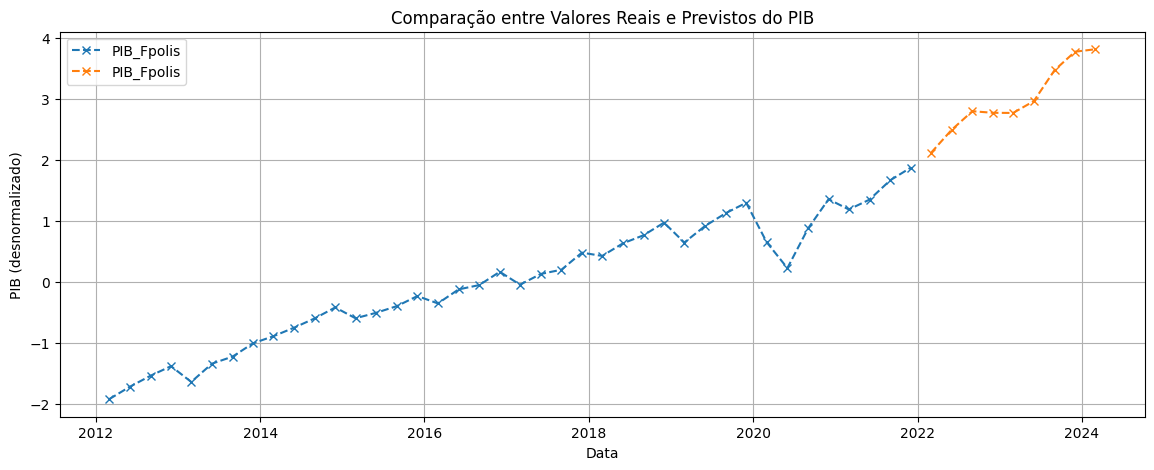

RMSE: 0.17101444427794932
R²: 0.9707540598483042
Equação da regressão linear:
y = 0.55 + (0.16 * Receitas_Correntes_PMF) + (0.25 * Preço_Médio_Venda_Imóvel_Residencial_FIPEZAP) + (-0.10 * ICV_UDESC) + (1.62 * Massa_Salarial_SC_IBGE_6474) + (-0.36 * Rendimento_Nominal_IBGE_6472) + (-0.06 * População_Fpolis_IBGE_5917) + (-0.12 * Consumo_MWh_Celesc) + (0.05 * Exportações_MDIC) + (-0.07 * Importações_MDIC)


In [ ]:
# Plotar o gráfico
plt.figure(figsize=(14, 5))
plt.plot(y_normalizado_treino.index, y_normalizado_treino, label='PIB_Fpolis', linestyle='--', marker='x')
plt.plot(X_normalizado_predicao.index, y_predicao, label='PIB_Fpolis', linestyle='--', marker='x')
plt.title('Comparação entre Valores Reais e Previstos do PIB')
plt.xlabel('Data')
plt.ylabel('PIB (desnormalizado)')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_normalizado_treino, model.predict(X_normalizado_treino))
rmse = np.sqrt(mse)
r2 = r2_score(y_normalizado_treino, model.predict(X_normalizado_treino))

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Obter a interceptação e os coeficientes
intercept = model.intercept_
coeficientes = model.coef_

# Exibir a equação
equacao = "y = {:.2f}".format(intercept)  # Começar com a interceptação
for i, coef in enumerate(coeficientes):
    equacao += " + ({:.2f} * {})".format(coef, X.columns[i])

print("Equação da regressão linear:")
print(equacao)

In [ ]:
# Exibir dados da previsão
datas_previsao = X_normalizado_predicao.index
df_previsao = pd.DataFrame({
    'Trimestre': datas_previsao,
    'PIB_previsao': y_desnormalizado
})
pd.options.display.float_format = '{:,.0f}'.format
print(df_previsao)

   Trimestre  PIB_previsao
0 2022-03-01     6,362,235
1 2022-06-01     6,653,936
2 2022-09-01     6,888,585
3 2022-12-01     6,868,684
4 2023-03-01     6,866,641
5 2023-06-01     7,015,592
6 2023-09-01     7,405,828
7 2023-12-01     7,639,583
8 2024-03-01     7,671,163
